##Object Detection using API

###Import Libraries

In [ ]:
import os
import pathlib

import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from six.moves.urllib.request import urlopen

import tensorflow as tf
import tensorflow_hub as hub

tf.get_logger().setLevel('ERROR')

###Connecting Google Drive and cloning tensorflow/models repository

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive')

In [ ]:
os.mkdir('tensorflow')

In [ ]:
%cd tensorflow

/content/drive/MyDrive/tensorflow


In [ ]:
# Clone the tensorflow models repository
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3689, done.
remote: Counting objects: 100% (3689/3689), done.
remote: Compressing objects: 100% (3071/3071), done.
remote: Total 3689 (delta 991), reused 1506 (delta 567), pack-reused 0
Receiving objects: 100% (3689/3689), 48.74 MiB | 7.66 MiB/s, done.
Resolving deltas: 100% (991/991), done.
Updating files: 100% (3351/3351), done.


####Installing API and protobuf compiler

In [ ]:
%%bash
sudo apt install -y protobuf-compiler
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Reading package lists...
Building dependency tree...
Reading state information...
protobuf-compiler is already the newest version (3.6.1.3-2ubuntu5).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/drive/MyDrive/tensorflow/models/research
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 KB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
def load_image_into_numpy_array(path):
    image = None
    if path.startswith('http'):
        response = urlopen(path)
        image_data = response.read()
        image_data = BytesIO(image_data)
        image = Image.open(image_data)
    else:
        image_data = tf.io.gfile.GFile(path, 'rb').read()
        image = Image.open(BytesIO(image_data))

    (im_width, im_height) = image.size
    
    return np.array(image.getdata()).reshape(
        (1, im_height, im_width, 3)).astype(np.uint8)


###Get Detector and the result

####Import object detection utilities

In [ ]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as utils_ops
%matplotlib inline

In [ ]:
PATH_TO_LABELS = './models/research/object_detection/data/mscoco_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS)

In [ ]:
url = 'https://tfhub.dev/tensorflow/mask_rcnn/inception_resnet_v2_1024x1024/1'
print("Loading ...")
detector  = hub.load(url)
print("Done ...")

Loading ...
Done ...


####Load Images

In [ ]:
img = load_image_into_numpy_array("https://s28258.pcdn.co/wp-content/uploads/2017/10/WhimsySoul-dublin-blog-20.jpg")

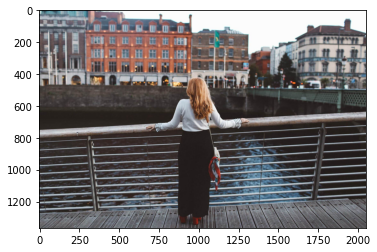

In [ ]:
plt.imshow(img[0])

#### Resultant data

In [ ]:
result = detector(img)

In [ ]:
result = {key:value.numpy() for key,value in result.items()}
print(result.keys())

dict_keys(['final_anchors', 'raw_detection_scores', 'detection_masks', 'proposal_boxes', 'box_classifier_features', 'rpn_box_predictor_features', 'refined_box_encodings', 'rpn_features_to_crop', 'detection_classes', 'rpn_box_encodings', 'detection_scores', 'num_detections', 'detection_anchor_indices', 'num_proposals', 'class_predictions_with_background', 'proposal_boxes_normalized', 'anchors', 'rpn_objectness_predictions_with_background', 'mask_predictions', 'detection_boxes', 'detection_multiclass_scores', 'image_shape', 'raw_detection_boxes'])


In [ ]:
result

{'final_anchors': array([[[0.30885684, 0.32496408, 0.97456396, 0.6327746 ],
         [0.39812005, 0.2367295 , 0.9398482 , 0.7096358 ],
         [0.2771905 , 0.23834915, 0.8133462 , 0.7087734 ],
         ...,
         [0.01288372, 0.        , 0.23354644, 0.42988712],
         [0.30843782, 0.5128289 , 0.3697672 , 0.53264207],
         [0.3462307 , 0.635295  , 0.36906677, 0.6454316 ]]], dtype=float32),
 'raw_detection_scores': array([[[4.28456151e-05, 9.99900699e-01, 7.94299524e-07, ...,
          1.87703904e-06, 3.97089543e-08, 1.62715832e-08],
         [2.04631798e-02, 9.78788137e-01, 1.35821228e-05, ...,
          8.89231615e-06, 2.52323929e-07, 2.15034973e-07],
         [1.48573846e-01, 8.50214660e-01, 1.31795668e-05, ...,
          1.43112666e-05, 7.87075351e-07, 4.65546037e-07],
         ...,
         [9.99967575e-01, 5.81436097e-06, 1.14291318e-07, ...,
          9.92144322e-08, 8.54647109e-09, 1.70131962e-08],
         [9.88019288e-01, 2.55000335e-03, 3.49912261e-06, ...,
        

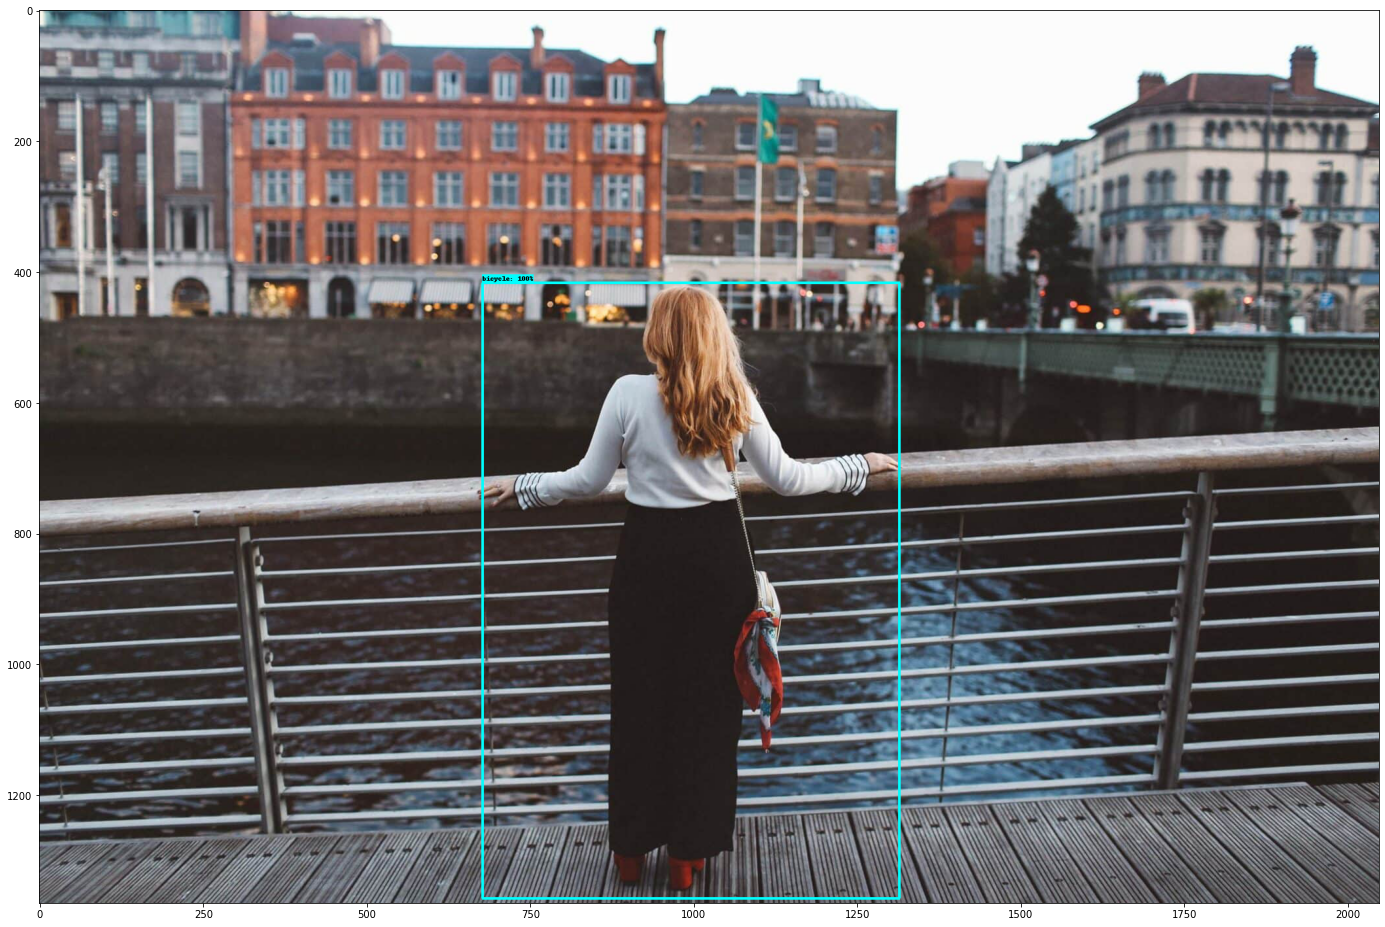

In [ ]:
label_id_offset = 1
image_np_with_detections = img.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
    image_np_with_detections[0],
    result['detection_boxes'][0],
    (result['detection_classes'][0] + label_id_offset).astype(int),
    result['detection_scores'][0],
    category_index,
    use_normalized_coordinates=True
)

plt.figure(figsize=(24,32))
plt.imshow(image_np_with_detections[0])
plt.show()